In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [29]:
brasileirao = pd.read_excel(f'../datasets/Brasileirao/match_history/all_games/historico-2015a2023.xlsx')
premier = pd.read_excel(f'../datasets/Premier_League/match_history/all_games/historico-2015a2023.xlsx')

In [30]:
brasileirao.head()

,date,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,season,team
0,2023-04-15,Série A,1,Sat,Home,W,2,1,sao_paulo,0.9,2.0,33.0,12.0,3.0,2023,botafogo_rj
1,2023-04-24,Série A,2,Mon,Away,W,2,1,bahia,0.2,0.9,42.0,5.0,3.0,2023,botafogo_rj
2,2023-04-30,Série A,3,Sun,Away,W,3,2,flamengo,1.9,3.1,26.0,11.0,5.0,2023,botafogo_rj
3,2023-05-07,Série A,4,Sun,Home,W,2,0,atl_mineiro,2.0,0.5,39.0,22.0,7.0,2023,botafogo_rj
4,2023-05-11,Série A,5,Thu,Home,W,3,0,corinthians,2.6,0.6,53.0,15.0,5.0,2023,botafogo_rj


# Analise do Brasileirao

In [32]:
y_bra = brasileirao['gf']
y_pre = premier['gf']

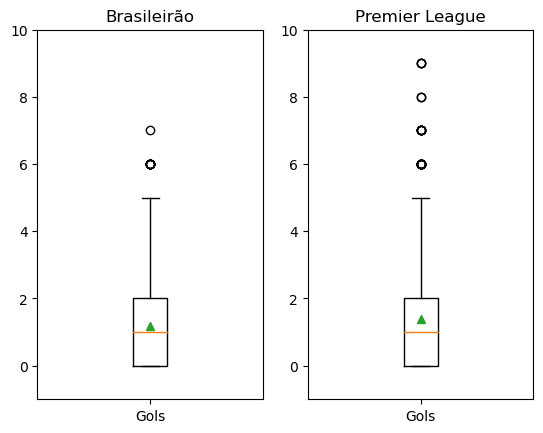

In [44]:
fig, axes = plt.subplots(1, 2)
# Brasileirao
axes[0].boxplot(y_bra, vert=True, showmeans= True)
axes[0].set_xticklabels(['Gols'])
axes[0].set_ylim(-1, 10)
axes[0].set_title("Brasileirão")

# Premier League
axes[1].boxplot(y_pre, vert=True, showmeans= True)
axes[1].set_xticklabels(['Gols'])
axes[1].set_ylim(-1, 10)
axes[1].set_title("Premier League")

plt.show()

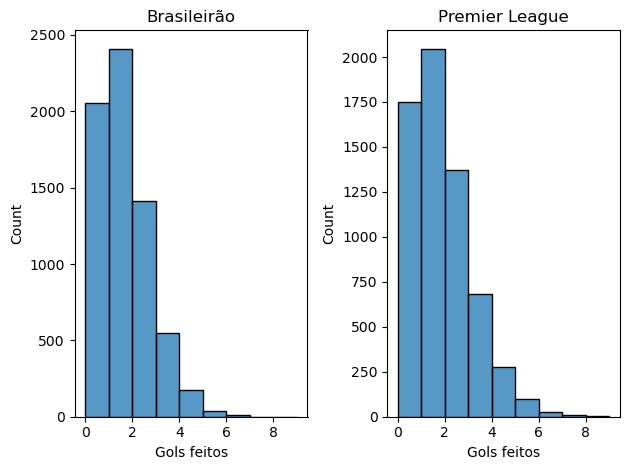

In [70]:
fig, axes = plt.subplots(1, 2)

# Brasileirao
sns.histplot(y_bra, ax= axes[0], bins= list(range(10)))
axes[0].set_title("Brasileirão")
axes[0].set_xlabel('Gols feitos')

# Premier League
sns.histplot(y_pre, ax= axes[1], bins= list(range(10)))
axes[1].set_title("Premier League")
axes[1].set_xlabel('Gols feitos')

plt.tight_layout()
plt.show()

In [71]:
y_bra.describe()

count    6656.000000
mean        1.179838
std         1.094054
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gf, dtype: float64

In [72]:
y_pre.describe()

count    6262.000000
mean        1.384382
std         1.272226
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: gf, dtype: float64

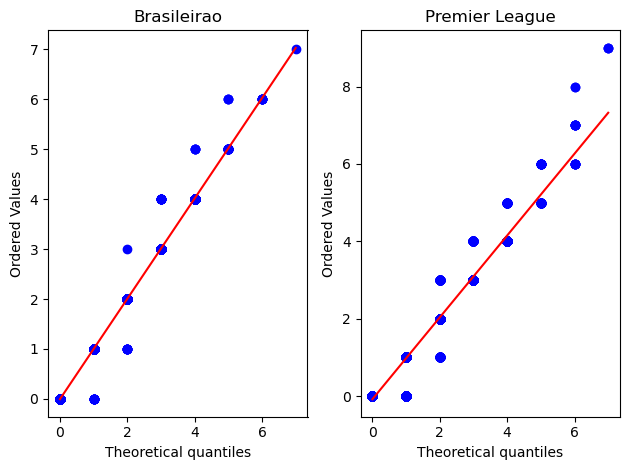

In [124]:
fig, axes = plt.subplots(1, 2)

#Brasileirao
stats.probplot(y_bra, dist= stats.poisson, sparams=(y_bra.mean()), plot= axes[0])
axes[0].set_title('Brasileirao')

#Premier Leag
stats.probplot(y_pre, dist= stats.poisson, sparams=(y_pre.mean()), plot= axes[1])
axes[1].set_title('Premier League')

plt.tight_layout()
plt.show()

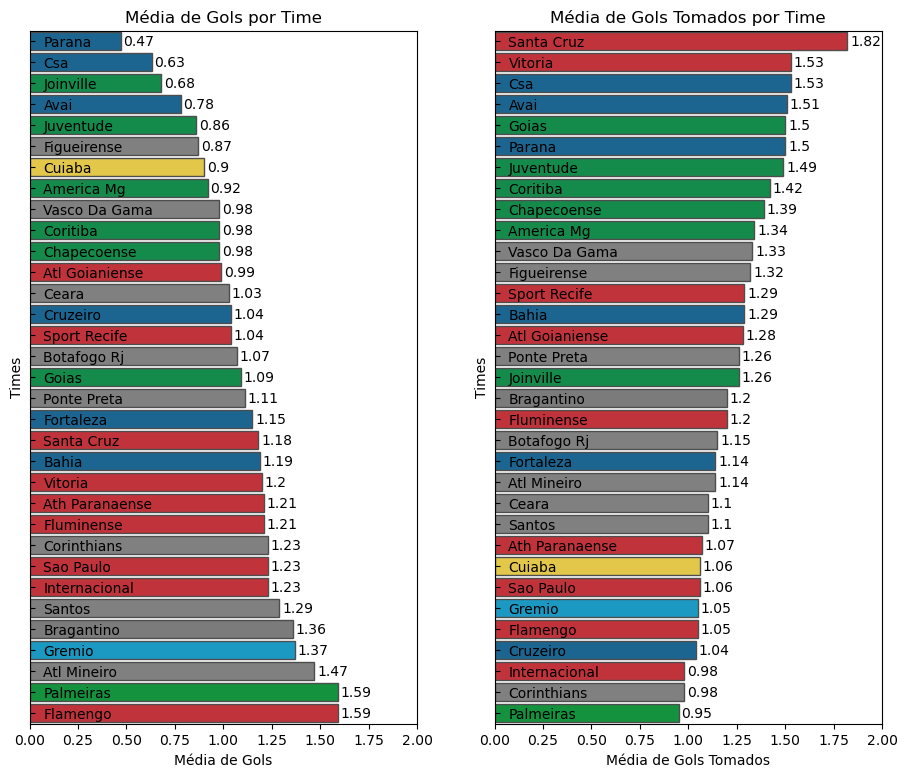

In [82]:
# Gols Feitos
df_sorted = brasileirao.groupby(['team'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
df_sorted['gf'] = df_sorted['gf'].round(2)
df_sorted['team'] = df_sorted['team'].str.replace('_', ' ')
df_sorted['team'] = df_sorted['team'].str.title()

# Gols tomados
df_sorted1 = brasileirao.groupby(['opponent'])['gf'].aggregate(np.mean).reset_index().sort_values('gf', ascending= False)
df_sorted1['gf'] = df_sorted1['gf'].round(2)
df_sorted1['opponent'] = df_sorted1['opponent'].str.replace('_', ' ')
df_sorted1['opponent'] = df_sorted1['opponent'].str.title()

# Define uma paleta de cores personalizada
team_colors = {
    'Parana': '#0A69A4',
    'Csa': '#0A69A4',
    'Joinville': '#009E49',
    'Avai': '#0A69A4',
    'Juventude': '#009E49',
    'Chapecoense': '#009E49',
    'Cuiaba': '#FDD731',
    'America Mg': '#009E49',
    'Coritiba': '#009E49',
    'Atl Goianiense': '#D91B26',
    'Cruzeiro': '#0A69A4',
    'Sport Recife': '#D91B26',
    'Goias': '#009E49',
    'Fortaleza': '#0A69A4',
    'Santa Cruz': '#D91B26',
    'Bahia': '#0A69A4',
    'Vitoria': '#D91B26',
    'Ath Paranaense': '#D91B26',
    'Fluminense': '#D91B26',
    'Sao Paulo': '#D91B26',
    'Internacional': '#D91B26',
    'Bragantino': '#7B7B7B',
    'Gremio': '#00A7DF',
    'Palmeiras': '#00A736',
    'Flamengo': '#D91B26'
}
custom_palette = [team_colors.get(team, 'gray') for team in df_sorted['team']]
custom_palette1 = [team_colors.get(team, 'gray') for team in df_sorted1['opponent']]

fig, ax = plt.subplots(1, 2, figsize= (11, 9))

# Barplot Gols Feitos
sns.barplot(data= df_sorted, x= 'gf', y= 'team', errorbar= None, palette= custom_palette, edgecolor= '0.3', width= 0.85, ax= ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize= 10, padding= 2)
ax[0].set_xlim(0, 2)
ax[0].tick_params(axis='y', direction='in',pad=-10)
ax[0].set_yticklabels(df_sorted['team'], horizontalalignment = "left")
ax[0].set_xlabel('Média de Gols')
ax[0].set_ylabel('Times')
ax[0].set_title('Média de Gols por Time')

# Barplot Gols Tomados
sns.barplot(data= df_sorted1, x= 'gf', y= 'opponent', errorbar= None, palette= custom_palette1, edgecolor= '0.3', width= 0.85, ax= ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize= 10, padding= 2)
ax[1].set_xlim(0, 2)
ax[1].tick_params(axis='y', direction='in',pad=-10)
ax[1].set_yticklabels(df_sorted1['opponent'], horizontalalignment = "left")
ax[1].set_xlabel('Média de Gols Tomados')
ax[1].set_ylabel('Times')
ax[1].set_title('Média de Gols Tomados por Time')

plt.show()

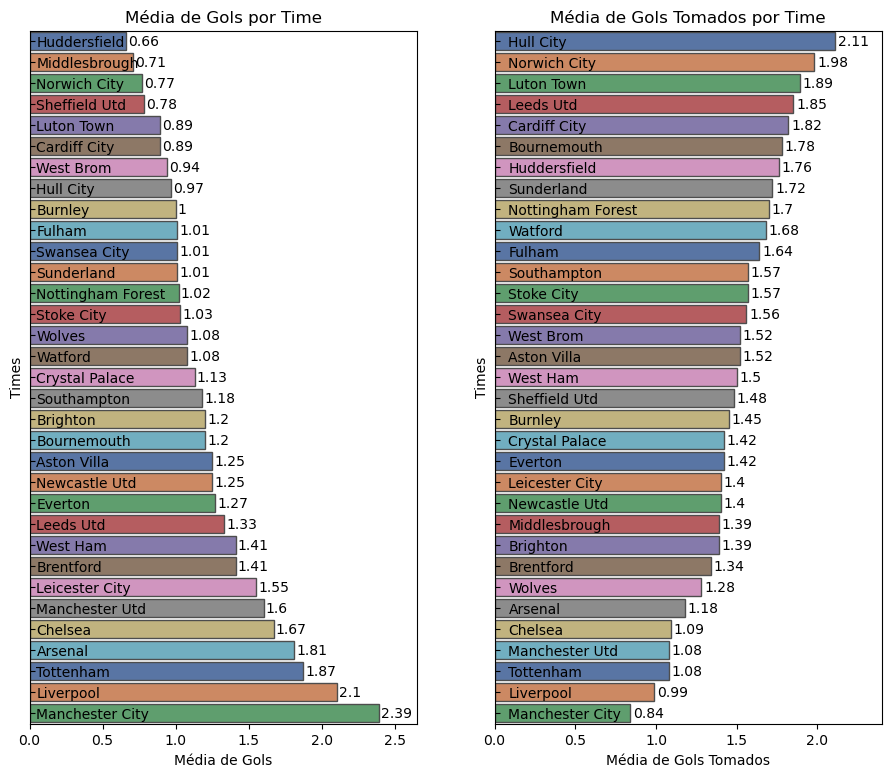

In [108]:
# Gols Feitos
df_sorted = premier.groupby(['team'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
df_sorted['gf'] = df_sorted['gf'].round(2)
df_sorted['team'] = df_sorted['team'].str.replace('_', ' ')
df_sorted['team'] = df_sorted['team'].str.title()

# Gols tomados
df_sorted1 = premier.groupby(['opponent'])['gf'].aggregate(np.mean).reset_index().sort_values('gf', ascending= False)
df_sorted1['gf'] = df_sorted1['gf'].round(2)
df_sorted1['opponent'] = df_sorted1['opponent'].str.replace('_', ' ')
df_sorted1['opponent'] = df_sorted1['opponent'].str.title()


fig, ax = plt.subplots(1, 2, figsize= (11, 9))

# Barplot Gols Feitos
sns.barplot(data= df_sorted, x= 'gf', y= 'team', errorbar= None, palette= 'deep', edgecolor= '0.3', width= 0.85, ax= ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize= 10, padding= 1.5)
ax[0].set_xlim(0, 2.65)
ax[0].tick_params(axis='y', direction='in',pad= -5)
ax[0].set_yticklabels(df_sorted['team'], horizontalalignment = "left")
ax[0].set_xlabel('Média de Gols')
ax[0].set_ylabel('Times')
ax[0].set_title('Média de Gols por Time')
ax[0].set

# Barplot Gols Tomados
sns.barplot(data= df_sorted1, x= 'gf', y= 'opponent', errorbar= None, palette= 'deep', edgecolor= '0.3', width= 0.85, ax= ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize= 10, padding= 2)
ax[1].set_xlim(0, 2.4)
ax[1].tick_params(axis='y', direction='in',pad=-10)
ax[1].set_yticklabels(df_sorted1['opponent'], horizontalalignment = "left")
ax[1].set_xlabel('Média de Gols Tomados')
ax[1].set_ylabel('Times')
ax[1].set_title('Média de Gols Tomados por Time')

plt.show()

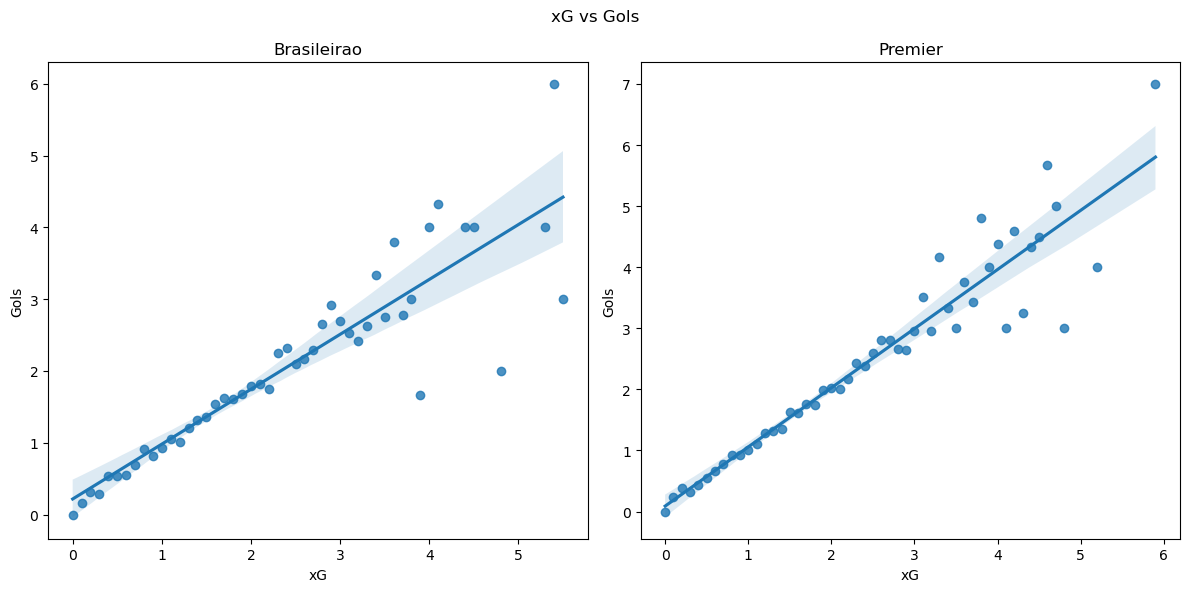

In [126]:
bra_xg = brasileirao.groupby(['xg'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_xg = premier.groupby(['xg'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.regplot(data= bra_xg, x= 'xg', y= 'gf', ax= axes[0])
axes[0].set_xlabel('xG')
axes[0].set_ylabel('Gols')
axes[0].set_title('Brasileirao')

#Premier League
sns.regplot(data= pre_xg, x= 'xg', y= 'gf', ax= axes[1])
axes[1].set_xlabel('xG')
axes[1].set_ylabel('Gols')
axes[1].set_title('Premier')

plt.suptitle('xG vs Gols')
plt.tight_layout()
plt.show()

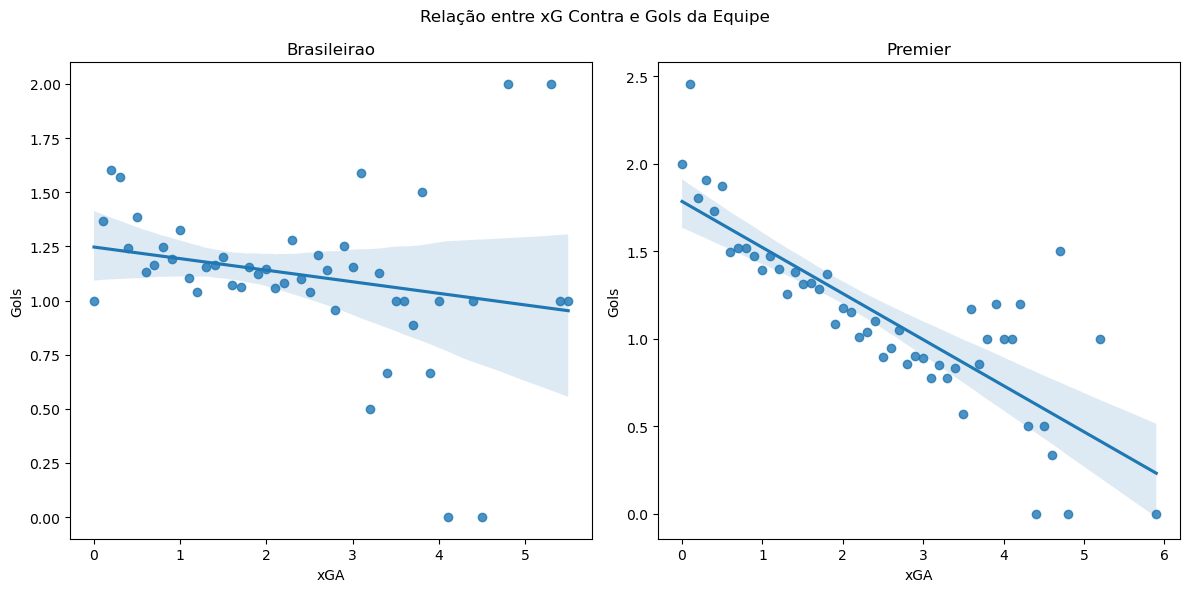

In [130]:
bra_xga = brasileirao.groupby(['xga'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_xga = premier.groupby(['xga'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.regplot(data= bra_xga, x= 'xga', y= 'gf', ax= axes[0])
axes[0].set_xlabel('xGA')
axes[0].set_ylabel('Gols')
axes[0].set_title('Brasileirao')

#Premier League
sns.regplot(data= pre_xga, x= 'xga', y= 'gf', ax= axes[1])
axes[1].set_xlabel('xGA')
axes[1].set_ylabel('Gols')
axes[1].set_title('Premier')

plt.suptitle('Relação entre xG Contra e Gols da Equipe')
plt.tight_layout()
plt.show()

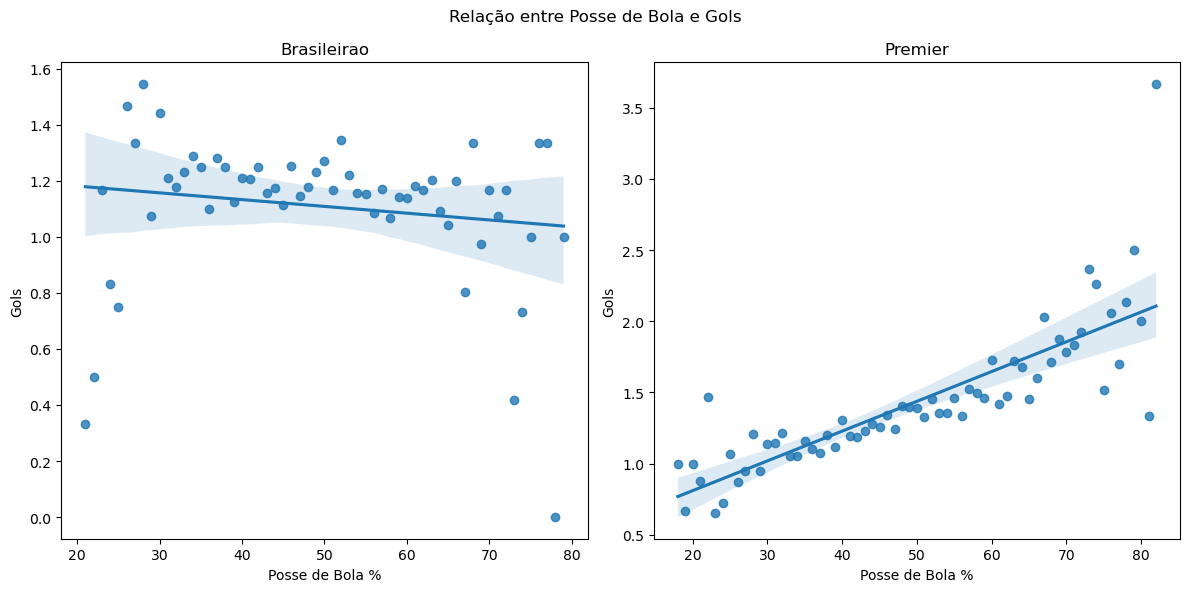

In [132]:
bra_poss = brasileirao.groupby(['poss'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_poss = premier.groupby(['poss'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.regplot(data= bra_poss, x= 'poss', y= 'gf', ax= axes[0])
axes[0].set_xlabel('Posse de Bola %')
axes[0].set_ylabel('Gols')
axes[0].set_title('Brasileirao')

#Premier League
sns.regplot(data= pre_poss, x= 'poss', y= 'gf', ax= axes[1])
axes[1].set_xlabel('Posse de Bola %')
axes[1].set_ylabel('Gols')
axes[1].set_title('Premier')

plt.suptitle('Relação entre Posse de Bola e Gols')
plt.tight_layout()
plt.show()

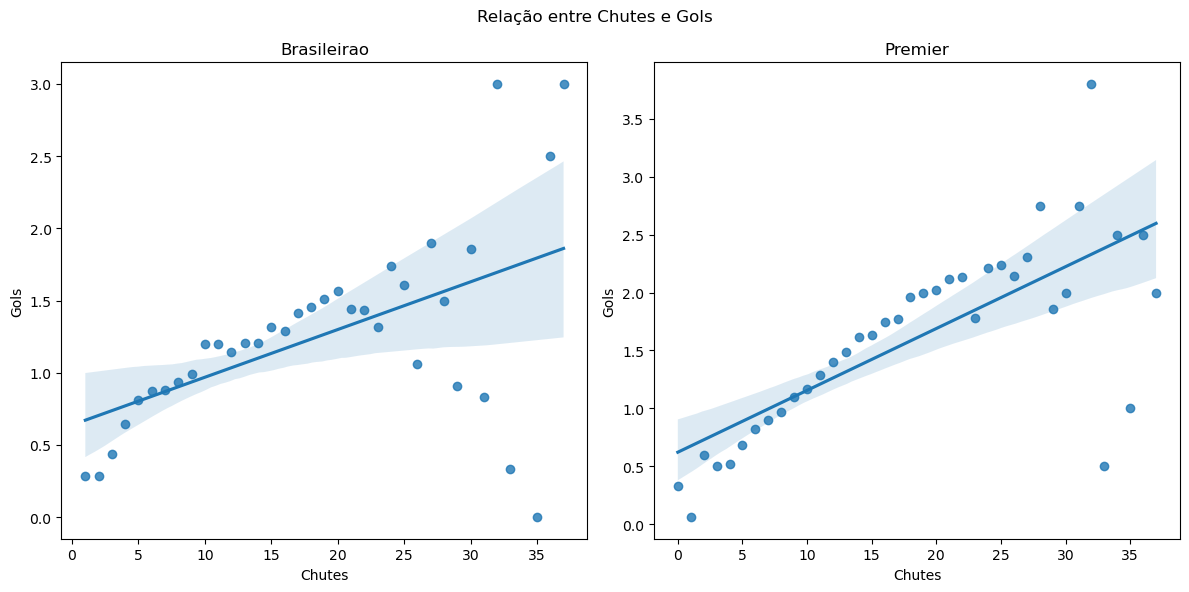

In [133]:
bra_sh = brasileirao.groupby(['sh'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_sh = premier.groupby(['sh'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.regplot(data= bra_sh, x= 'sh', y= 'gf', ax= axes[0])
axes[0].set_xlabel('Chutes')
axes[0].set_ylabel('Gols')
axes[0].set_title('Brasileirao')

#Premier League
sns.regplot(data= pre_sh, x= 'sh', y= 'gf', ax= axes[1])
axes[1].set_xlabel('Chutes')
axes[1].set_ylabel('Gols')
axes[1].set_title('Premier')

plt.suptitle('Relação entre Chutes e Gols')
plt.tight_layout()
plt.show()

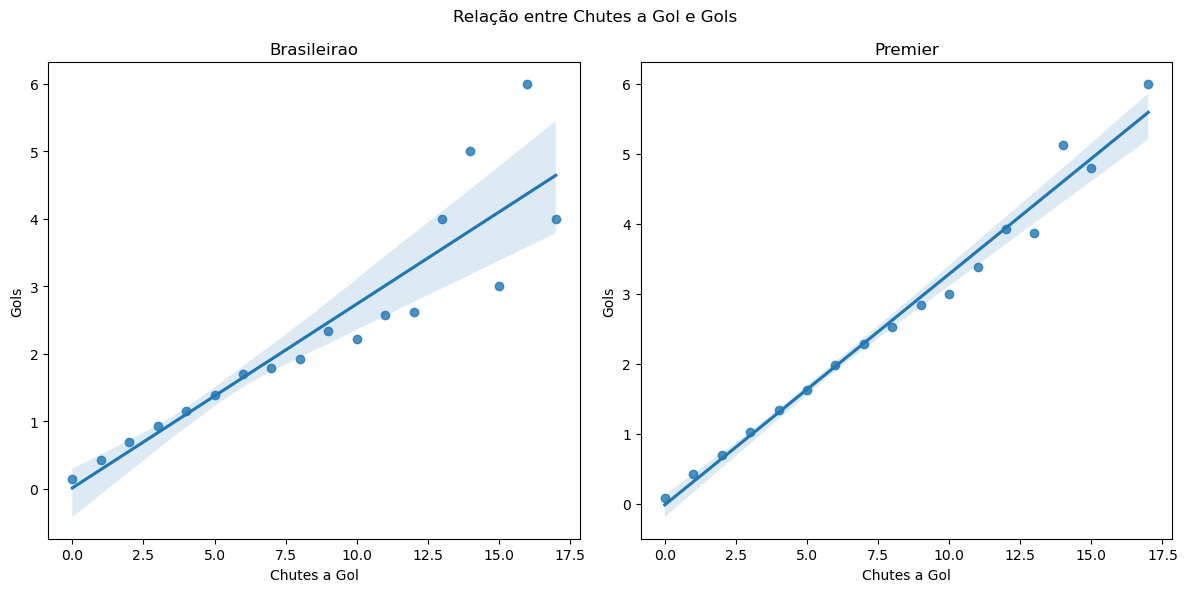

In [134]:
bra_sot = brasileirao.groupby(['sot'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_sot = premier.groupby(['sot'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.regplot(data= bra_sot, x= 'sot', y= 'gf', ax= axes[0])
axes[0].set_xlabel('Chutes a Gol')
axes[0].set_ylabel('Gols')
axes[0].set_title('Brasileirao')

#Premier League
sns.regplot(data= pre_sot, x= 'sot', y= 'gf', ax= axes[1])
axes[1].set_xlabel('Chutes a Gol')
axes[1].set_ylabel('Gols')
axes[1].set_title('Premier')

plt.suptitle('Relação entre Chutes a Gol e Gols')
plt.tight_layout()
plt.show()

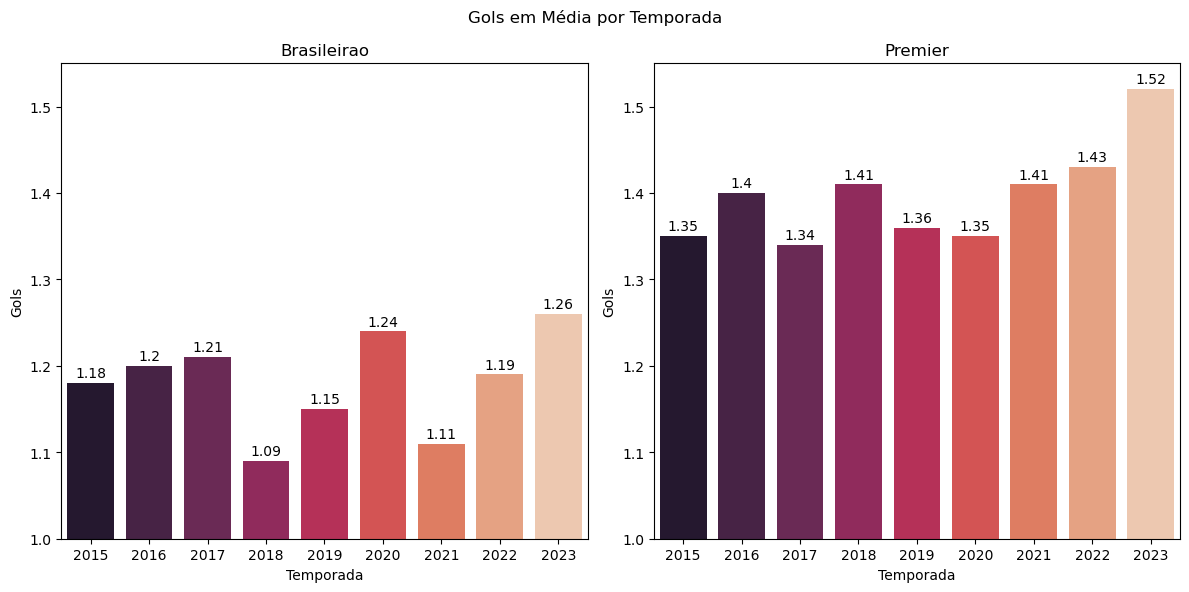

In [161]:
bra_season = brasileirao.groupby(['season'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
bra_season['gf'] = bra_season['gf'].round(2)
pre_season = premier.groupby(['season'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_season['gf'] = pre_season['gf'].round(2)

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.barplot(data= bra_season, x= 'season', y= 'gf', ax= axes[0], palette= 'rocket')
axes[0].set_xlabel('Temporada')
axes[0].set_ylabel('Gols')
axes[0].set_ylim(1, 1.55)
axes[0].bar_label(axes[0].containers[0], fontsize= 10, padding= 2)
axes[0].set_title('Brasileirao')

#Premier League
sns.barplot(data= pre_season, x= 'season', y= 'gf', ax= axes[1], palette= 'rocket')
axes[1].set_xlabel('Temporada')
axes[1].set_ylabel('Gols')
axes[1].set_ylim(1, 1.55)
axes[1].bar_label(axes[1].containers[0], fontsize= 10, padding= 2)
axes[1].set_title('Premier')

plt.suptitle('Gols em Média por Temporada')
plt.tight_layout()
plt.show()

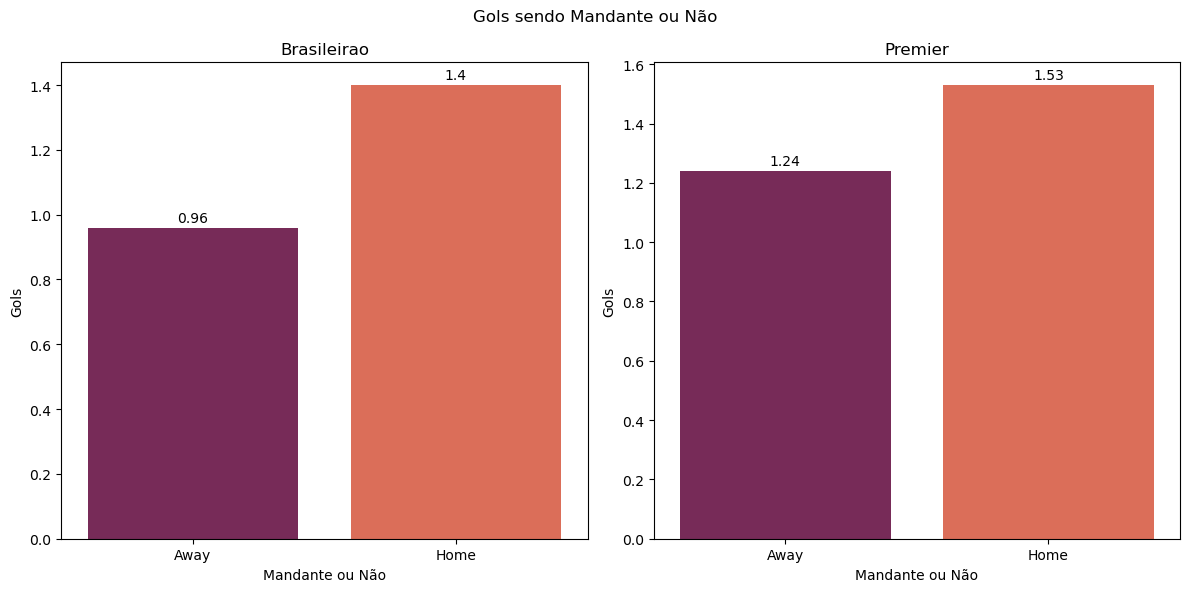

In [177]:
bra_venue = brasileirao.groupby(['venue'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
bra_venue['gf'] = bra_venue['gf'].round(2)
pre_venue = premier.groupby(['venue'])['gf'].aggregate(np.mean).reset_index().sort_values('gf')
pre_venue['gf'] = pre_venue['gf'].round(2)

fig, axes = plt.subplots(1, 2, figsize= (12, 6))

#Brasileirao
sns.barplot(data= bra_venue, x= 'venue', y= 'gf', ax= axes[0], palette= 'rocket')
axes[0].set_xlabel('Mandante ou Não')
axes[0].set_ylabel('Gols')
axes[0].bar_label(axes[0].containers[0], fontsize= 10, padding= 2)
axes[0].set_title('Brasileirao')

#Premier League
sns.barplot(data= pre_venue, x= 'venue', y= 'gf', ax= axes[1], palette= 'rocket')
axes[1].set_xlabel('Mandante ou Não')
axes[1].set_ylabel('Gols')
axes[1].bar_label(axes[1].containers[0], fontsize= 10, padding= 2)
axes[1].set_title('Premier')

plt.suptitle('Gols sendo Mandante ou Não')
plt.tight_layout()
plt.show()

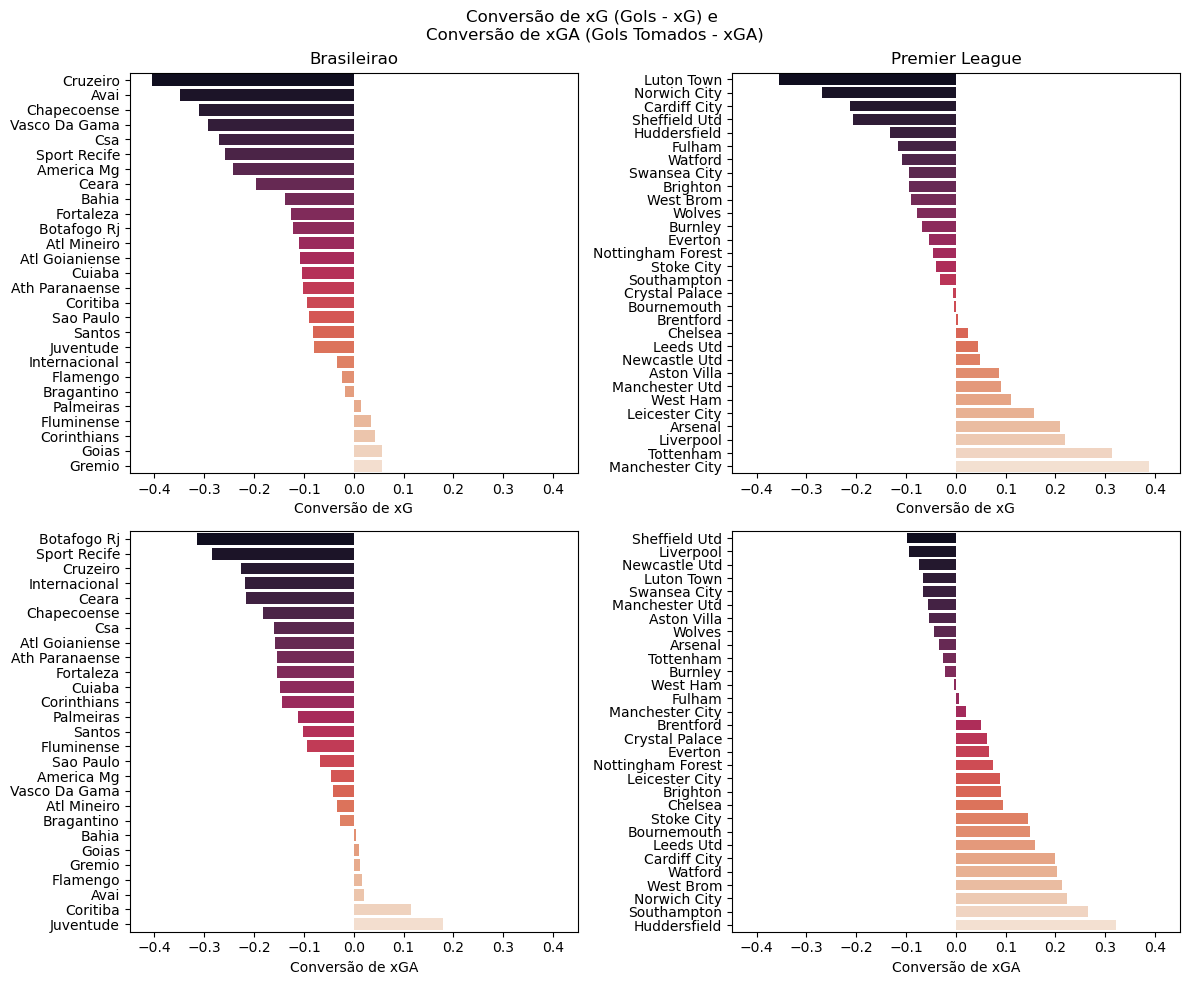

In [243]:
#Criação dos xgconv
brasileirao['xgconv'] = brasileirao['gf'] - brasileirao['xg']
brasileirao['xgaconv'] = brasileirao['ga'] - brasileirao['xga']
premier['xgconv'] = premier['gf'] - premier['xg']
premier['xgaconv'] = premier['ga'] - premier['xga']

bra_xgconv = brasileirao.groupby(['team'])[['xgconv', 'xgaconv']].aggregate(np.mean).dropna().reset_index().sort_values('xgconv')
bra_xgconv['team'] = bra_xgconv['team'].str.replace('_', ' ')
bra_xgconv['team'] = bra_xgconv['team'].str.title()
bra_xgaconv = bra_xgconv.sort_values('xgaconv')

pre_xgconv = premier.groupby(['team'])[['xgconv', 'xgaconv']].aggregate(np.mean).dropna().reset_index().sort_values('xgconv')
pre_xgconv['team'] = pre_xgconv['team'].str.replace('_', ' ')
pre_xgconv['team'] = pre_xgconv['team'].str.title()
pre_xgaconv = pre_xgconv.sort_values('xgaconv')


fig, axes = plt.subplots(2, 2, figsize= (12, 10))
#Brasileirao
sns.barplot(data= bra_xgconv, x= 'xgconv', y= 'team', ax= axes[0, 0], palette= 'rocket')
axes[0, 0].set_xlabel('Conversão de xG')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlim(-0.45, 0.45)
axes[0, 0].set_title('Brasileirao')

sns.barplot(data= bra_xgaconv, x= 'xgaconv', y= 'team', ax= axes[1, 0], palette= 'rocket')
axes[1, 0].set_xlabel('Conversão de xGA')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlim(-0.45, 0.45)


#Premier League
sns.barplot(data= pre_xgconv, x= 'xgconv', y= 'team', ax= axes[0, 1], palette= 'rocket')
axes[0, 1].set_xlabel('Conversão de xG')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlim(-0.45, 0.45)
axes[0, 1].set_title('Premier League')

sns.barplot(data= pre_xgaconv, x= 'xgaconv', y= 'team', ax= axes[1, 1], palette= 'rocket')
axes[1, 1].set_xlabel('Conversão de xGA')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlim(-0.45, 0.45)

plt.suptitle('Conversão de xG (Gols - xG) e \nConversão de xGA (Gols Tomados - xGA)')
plt.tight_layout()
plt.show()

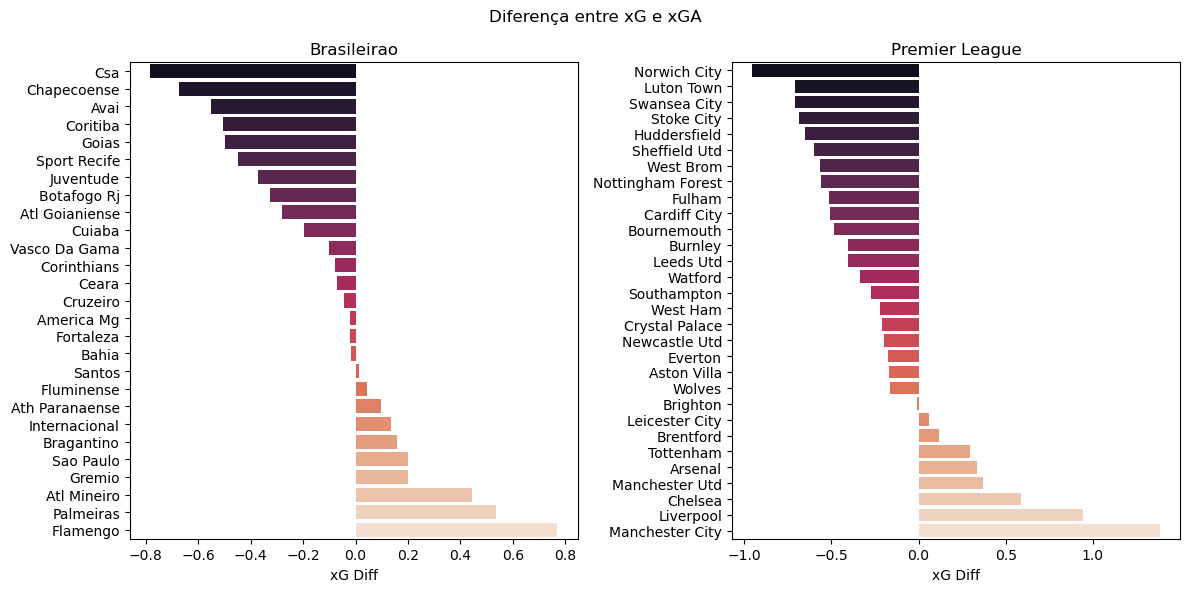

In [248]:
#Criação dos xgdiff
brasileirao['xgdiff'] = brasileirao['xg'] - brasileirao['xga']
premier['xgdiff'] = premier['xg'] - premier['xga']

bra_xgdiff = brasileirao.groupby(['team'])['xgdiff'].aggregate(np.mean).dropna().reset_index().sort_values('xgdiff')
bra_xgdiff['team'] = bra_xgdiff['team'].str.replace('_', ' ')
bra_xgdiff['team'] = bra_xgdiff['team'].str.title()

pre_xgdiff = premier.groupby(['team'])['xgdiff'].aggregate(np.mean).dropna().reset_index().sort_values('xgdiff')
pre_xgdiff['team'] = pre_xgdiff['team'].str.replace('_', ' ')
pre_xgdiff['team'] = pre_xgdiff['team'].str.title()


fig, axes = plt.subplots(1, 2, figsize= (12, 6))
#Brasileirao
sns.barplot(data= bra_xgdiff, x= 'xgdiff', y= 'team', ax= axes[0], palette= 'rocket')
axes[0].set_xlabel('xG Diff')
axes[0].set_ylabel('')
#axes[0].set_xlim(-0.45, 0.45)
axes[0].set_title('Brasileirao')


#Premier League
sns.barplot(data= pre_xgdiff, x= 'xgdiff', y= 'team', ax= axes[1], palette= 'rocket')
axes[1].set_xlabel('xG Diff')
axes[1].set_ylabel('')
#axes[1].set_xlim(-0.45, 0.45)
axes[1].set_title('Premier League')

plt.suptitle('Diferença entre xG e xGA')
plt.tight_layout()
plt.show()